# Imports
 paths based on my downloaded items in my Google Drive

In [2]:
import google.colab
google.colab.drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
os.chdir('/content/drive/MyDrive/mimic-iv-ed-2.2/ed')

In [4]:
import numpy as np
import pandas as pd

In [5]:
import importlib
import mlp
import attack
import preprocess
importlib.reload(mlp)
importlib.reload(preprocess)
importlib.reload(attack)
from mlp import *
from preprocess import *
from attack import *

# Data
MIMIC-EV-Data tables merged and preprocessed for MLP training (everything done in preprocess.py)

In [6]:
# Preprocess MIMIC-IV-ED Data so that it can be used for model training
df = preprocess_data()

In [7]:
pd.set_option('display.max_columns', None)
df.head()

,subject_id,stay_id,gender,race,arrival_transport,disposition,temperature,heartrate,resprate,o2sat,sbp,dbp,pain,acuity,seq_num,icd_version,etc_rn,totaltime,chiefcomplaint_abdpain,chiefcomplaint_abnormallabs,chiefcomplaint_alteredmentalstatus,chiefcomplaint_backpain,chiefcomplaint_brbpr,chiefcomplaint_chestpain,"chiefcomplaint_chestpain,dyspnea",chiefcomplaint_dizziness,chiefcomplaint_dyspnea,chiefcomplaint_fever,chiefcomplaint_headache,chiefcomplaint_lowerbackpain,chiefcomplaint_n/v,chiefcomplaint_n/v/d,chiefcomplaint_s/pfall,chiefcomplaint_si,chiefcomplaint_sob,chiefcomplaint_syncope,chiefcomplaint_weakness,chiefcomplaint_woundeval,icd_code_25000,icd_code_2720,icd_code_4019,icd_code_4280,icd_code_486,icd_code_5990,icd_code_7242,icd_code_78060,icd_code_78650,icd_code_78909,icd_code_E119,icd_code_E8889,icd_code_I10,icd_code_M545,icd_code_R0600,icd_code_R079,icd_code_R109,icd_code_R531,icd_code_V5867,icd_code_Z794,etccode_156.0,etccode_250.0,etccode_290.0,etccode_301.0,etccode_414.0,etccode_445.0,etccode_523.0,etccode_575.0,etccode_577.0,etccode_670.0,etccode_701.0,etccode_2683.0,etccode_3510.0,etccode_3948.0,etccode_4609.0,etccode_5843.0,etccode_5904.0,etccode_5970.0,etccode_6094.0,etccode_6615.0,gsn_2173.0,gsn_2532.0,gsn_3009.0,gsn_3757.0,gsn_4376.0,gsn_4380.0,gsn_4490.0,gsn_4560.0,gsn_6373.0,gsn_8208.0,gsn_13318.0,gsn_16927.0,gsn_16995.0,gsn_18368.0,gsn_18698.0,gsn_22159.0,gsn_27462.0,gsn_28090.0,gsn_33530.0,gsn_47780.0,ndc_10003011501.0,ndc_10003011602.0,ndc_10135011101.0,ndc_10135015001.0,ndc_10135017301.0,ndc_10135024036.0,ndc_10135052603.0,ndc_10544013130.0,ndc_10544034130.0,ndc_10544045530.0,ndc_10585086504.0,ndc_11845014770.0,ndc_11845015001.0,ndc_12280027016.0,ndc_13668009705.0,ndc_16590005828.0,ndc_16590031330.0,ndc_21695042308.0,ndc_45802064287.0,ndc_49999099410.0
251,10000635,31767754,0,1,4,1,-0.306456,-1.569395,-0.758650,0.200346,-0.095139,-0.110565,0,2.0,2.0,0,1.0,-0.424933,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
256,10000635,31767754,0,1,4,1,-0.306456,-1.569395,-0.758650,0.200346,-0.095139,-0.110565,0,2.0,3.0,0,1.0,-0.424933,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
292,10000764,35420907,1,4,0,0,0.349926,0.581564,-0.023713,0.200346,-0.053941,-0.001150,3,2.0,2.0,1,1.0,-0.682602,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
293,10000764,35420907,1,4,0,0,0.349926,0.581564,-0.023713,0.200346,-0.053941,-0.001150,3,2.0,2.0,1,2.0,-0.682602,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
492,10000980,35392246,0,1,4,0,0.021735,0.342568,-0.023713,-0.014414,2.005956,0.469332,0,2.0,1.0,1,1.0,-0.189320,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
df.shape

(104138, 118)

In [9]:
df['disposition'].value_counts()

,count
disposition,
1,60692
0,43446


# Target MLP



need to do:

- plot tnse plot of feature vector to see if they cluster well by patient level

- cross validation is not split by patient level so need to make that adjustment


Epoch 1/30
651/651 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.7208 - loss: 0.5593 - val_accuracy: 0.7879 - val_loss: 0.4308
Epoch 2/30
651/651 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7837 - loss: 0.4452 - val_accuracy: 0.7911 - val_loss: 0.4252
Epoch 3/30
651/651 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7898 - loss: 0.4330 - val_accuracy: 0.7973 - val_loss: 0.4132
Epoch 4/30
651/651 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7974 - loss: 0.4192 - val_accuracy: 0.8014 - val_loss: 0.4112
Epoch 5/30
651/651 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8021 - loss: 0.4152 - val_accuracy: 0.8080 - val_loss: 0.4021
Epoch 6/30
651/651 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8051 - loss: 0.4129 - val_accuracy: 0.8103 - val_loss: 0.3959
Epoch 7/30
651/651 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8096 - loss: 0.4021 - val_accuracy: 0.8065 - val_loss: 0.4034
Epoch 8/30
651/651 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8105 - loss: 0.3963 - val_accuracy: 0.

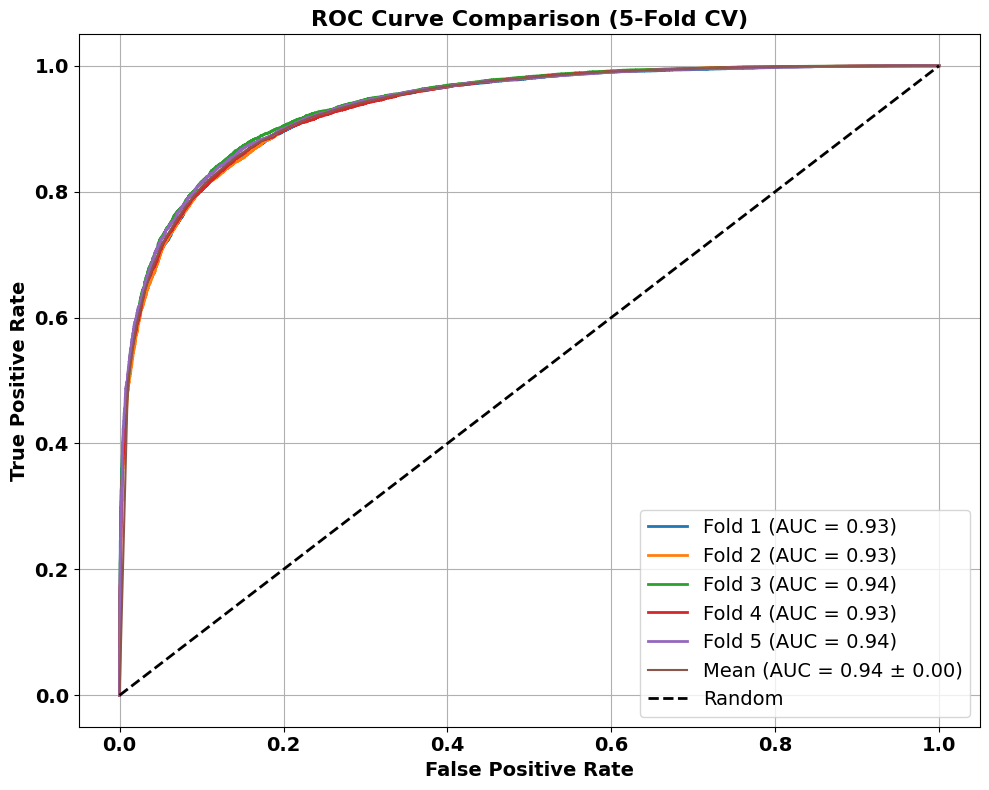

In [34]:
target_model_cv(df, target_col = 'disposition', drop_columns = ['disposition', 'subject_id', 'stay_id'], K = 2, early_stopping=True)


Epoch 1/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.7167 - loss: 0.5738 - val_accuracy: 0.7802 - val_loss: 0.4384
Epoch 2/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7817 - loss: 0.4497 - val_accuracy: 0.7807 - val_loss: 0.4338
Epoch 3/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7935 - loss: 0.4295 - val_accuracy: 0.7791 - val_loss: 0.4337
Epoch 4/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8022 - loss: 0.4174 - val_accuracy: 0.7771 - val_loss: 0.4346
Epoch 5/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8074 - loss: 0.4076 - val_accuracy: 0.7785 - val_loss: 0.4403
Epoch 6/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8118 - loss: 0.4011 - val_accuracy: 0.7785 - val_loss: 0.4401
Epoch 7/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8186 - loss: 0.3903 - val_accuracy: 0.7783 - val_loss: 0.4433
Epoch 8/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8214 - loss: 0.3841 - val_accuracy: 0

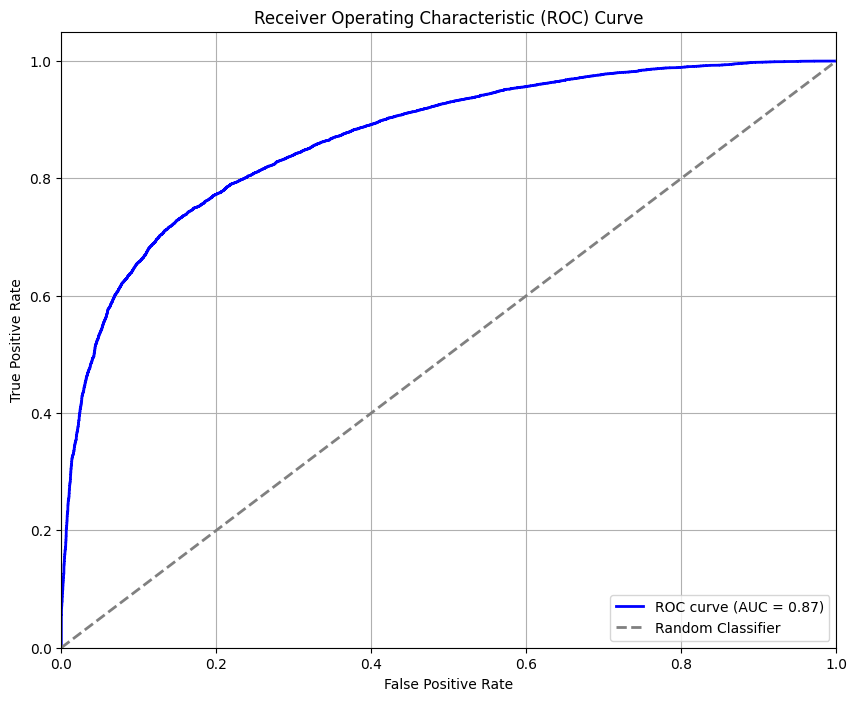

Confidence Score AUC 95% bootstrap CI: [0.486, 0.541]
Grad Norm AUC 95% bootstrap CI: [0.471, 0.521]
Negative Loss AUC 95% bootstrap CI: [0.486, 0.541]


In [26]:
confidence_lower, confidence_upper, grad_lower, grad_upper, loss_lower, loss_upper = seed_loop_for_bootstrap2(df, target_col = 'disposition', drop_columns = ['disposition', 'subject_id', 'stay_id'], K = 2, early_stopping=True)



print(f"Confidence Score AUC 95% bootstrap CI: [{confidence_lower:.3f}, {confidence_upper:.3f}]")
print(f"Grad Norm AUC 95% bootstrap CI: [{grad_lower:.3f}, {grad_upper:.3f}]")
print(f"Negative Loss AUC 95% bootstrap CI: [{loss_lower:.3f}, {loss_upper:.3f}]")


# MIA via RF


need to do:
- plot distribution of loss, confidence score, etc to visualize distribution




Epoch 1/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.7167 - loss: 0.5738 - val_accuracy: 0.7785 - val_loss: 0.4385
Epoch 2/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7818 - loss: 0.4494 - val_accuracy: 0.7797 - val_loss: 0.4343
Epoch 3/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7923 - loss: 0.4295 - val_accuracy: 0.7800 - val_loss: 0.4345
Epoch 4/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8024 - loss: 0.4175 - val_accuracy: 0.7779 - val_loss: 0.4347
Epoch 5/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8063 - loss: 0.4077 - val_accuracy: 0.7764 - val_loss: 0.4399
Epoch 6/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8119 - loss: 0.4011 - val_accuracy: 0.7780 - val_loss: 0.4407
Epoch 7/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8195 - loss: 0.3905 - val_accuracy: 0.7788 - val_loss: 0.4438
Epoch 8/30
495/495 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8226 - loss: 0.3837 - val_accuracy: 0

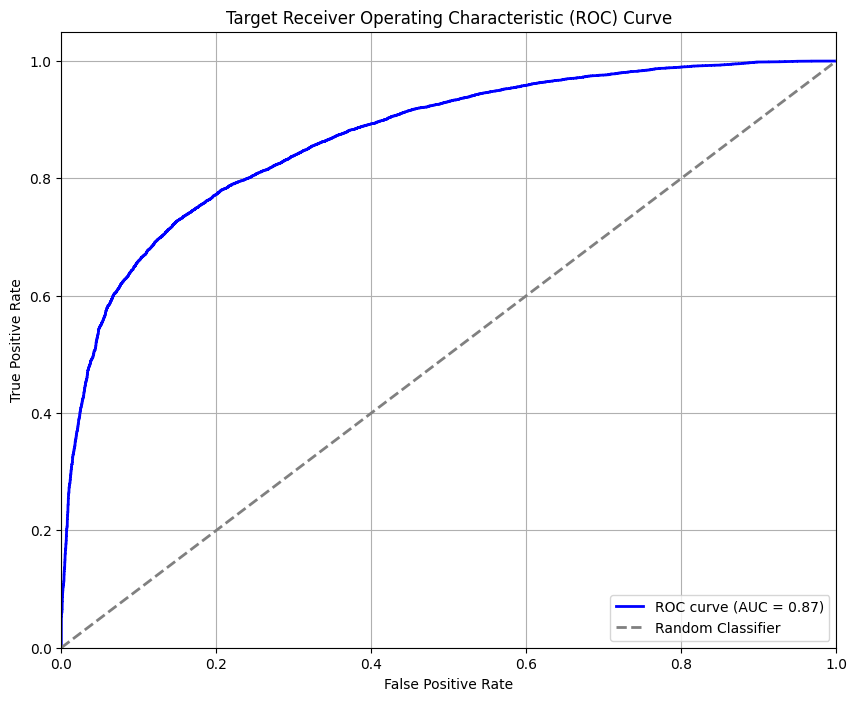

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8181 - loss: 0.3934
 Member Test Accuracy: 0.8176
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.78      0.78      8307
           1       0.84      0.85      0.84     11693

    accuracy                           0.82     20000
   macro avg       0.81      0.81      0.81     20000
weighted avg       0.82      0.82      0.82     20000



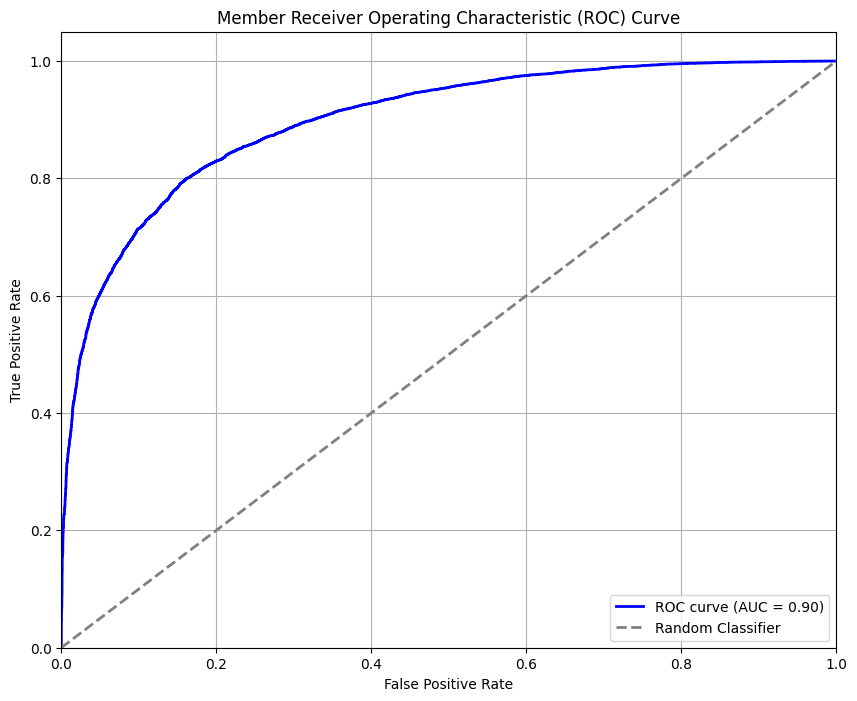

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7773 - loss: 0.4466
 Non Member Test Accuracy: 0.7775
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.74      0.74      8361
           1       0.81      0.81      0.81     11639

    accuracy                           0.78     20000
   macro avg       0.77      0.77      0.77     20000
weighted avg       0.78      0.78      0.78     20000



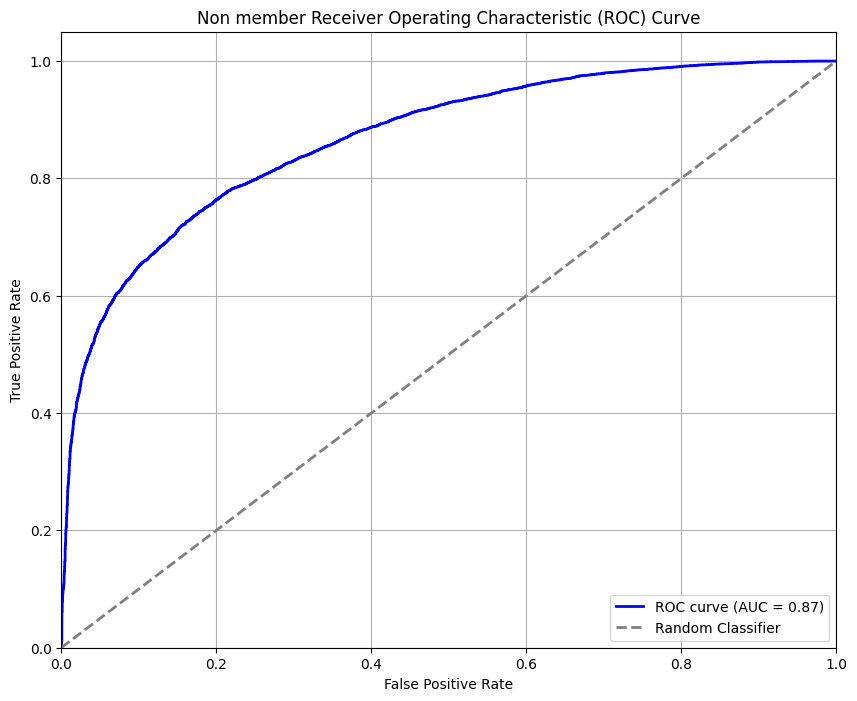

625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [10]:
negative_loss_member, negative_loss_non_member, confidence_score_member, confidence_score_non_member, grads_member_norm, grads_non_member_norm, feature_vector_member, feature_vector_non_member, softmax_member, softmax_non_member, true_member, true_non_member = seed_loop(df, target_col = 'disposition', drop_columns = ['disposition', 'subject_id', 'stay_id'], K = 2, early_stopping=True)


In [11]:
def mia_dataset_softmax(softmax_member, softmax_non_member):
  df_member = pd.DataFrame({
      'Class 0': softmax_member[:, 0],
      'Class 1': softmax_member[:, 1],
      'Negative Loss': negative_loss_member,
      'True Label': true_member.to_numpy()

  })

  df_member['Membership'] = 1

  df_non_member = pd.DataFrame({
      'Class 0': softmax_non_member[:, 0],
      'Class 1': softmax_non_member[:, 1],
      'Negative Loss': negative_loss_non_member,
      'True Label': true_non_member.to_numpy()
  })

  df_non_member['Membership'] = 0

  df = pd.concat([df_member, df_non_member], axis = 0)

  return df

In [12]:
mia_df_softmax = mia_dataset_softmax(softmax_member, softmax_non_member)
mia_df_softmax.head()

,Class 0,Class 1,Negative Loss,True Label,Membership
0,0.587002,0.412998,-0.532727,0,1
1,0.295319,0.704681,-0.350010,1,1
2,0.015673,0.984327,-0.015798,1,1
3,0.731179,0.268821,-0.313096,0,1
4,0.025118,0.974882,-0.025439,1,1


In [13]:
def mia_dataset(negative_loss_member, negative_loss_non_member, confidence_score_member, confidence_score_non_member, grads_member_norm, grads_non_member_norm):



  df_member = pd.DataFrame({
      'negative_loss': negative_loss_member,
      'confidence_score': confidence_score_member,
      'grad_norm': grads_member_norm
  })

  df_member['Membership'] = 1

  df_non_member = pd.DataFrame({
      'negative_loss': negative_loss_non_member,
      'confidence_score': confidence_score_non_member,
      'grad_norm': grads_non_member_norm
  })

  df_non_member['Membership'] = 0

  df = pd.concat([df_member, df_non_member], axis = 0)

  return df

In [14]:
mia_dataset = mia_dataset(negative_loss_member, negative_loss_non_member, confidence_score_member, confidence_score_non_member, grads_member_norm, grads_non_member_norm)
mia_dataset.head()

,negative_loss,confidence_score,grad_norm,Membership
0,-0.532727,0.587002,0.000000e+00,1
1,-0.350010,0.704681,7.901374e-08,1
2,-0.015798,0.984327,1.194077e-07,1
3,-0.313096,0.731179,0.000000e+00,1
4,-0.025439,0.974882,0.000000e+00,1


In [15]:
def mia_dataset(feature_vector_member, feature_vector_non_member):
    df_member = pd.DataFrame(feature_vector_member, columns=[f'feature_{i+1}' for i in range(feature_vector_member.shape[1])])
    df_member['Membership'] = 1

    df_non_member = pd.DataFrame(feature_vector_non_member, columns=[f'feature_{i+1}' for i in range(feature_vector_non_member.shape[1])])
    df_non_member['Membership'] = 0


    df = pd.concat([df_member, df_non_member], ignore_index=True)

    return df

In [16]:
mia_df_feature = mia_dataset(feature_vector_member, feature_vector_non_member)

In [17]:
mia_df_feature.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,feature_86,feature_87,feature_88,feature_89,feature_90,feature_91,feature_92,feature_93,feature_94,feature_95,feature_96,feature_97,feature_98,feature_99,feature_100,feature_101,feature_102,feature_103,feature_104,feature_105,feature_106,feature_107,feature_108,feature_109,feature_110,feature_111,feature_112,feature_113,feature_114,feature_115,feature_116,feature_117,feature_118,feature_119,feature_120,feature_121,feature_122,feature_123,feature_124,feature_125,feature_126,feature_127,feature_128,feature_129,feature_130,feature_131,feature_132,feature_133,feature_134,feature_135,feature_136,feature_137,feature_138,feature_139,feature_140,feature_141,feature_142,feature_143,feature_144,feature_145,feature_146,feature_147,feature_148,feature_149,feature_150,feature_151,feature_152,feature_153,feature_154,feature_155,feature_156,feature_157,feature_158,feature_159,feature_160,feature_161,feature_162,feature_163,feature_164,feature_165,feature_166,feature_167,feature_168,feature_169,feature_170,feature_171,feature_172,feature_173,feature_174,feature_175,feature_176,feature_177,feature_178,feature_179,feature_180,feature_181,feature_182,feature_183,feature_184,feature_185,feature_186,feature_187,feature_188,feature_189,feature_190,feature_191,feature_192,feature_193,feature_194,feature_195,feature_196,feature_197,feature_198,feature_199,feature_200,feature_201,feature_202,feature_203,feature_204,feature_205,feature_206,feature_207,feature_208,feature_209,feature_210,feature_211,feature_212,feature_213,feature_214,feature_215,feature_216,feature_217,feature_218,feature_219,feature_220,feature_221,feature_222,feature_223,feature_224,feature_225,feature_226,feature_227,feature_228,feature_229,feature_230,feature_231,feature_232,feature_233,feature_234,feature_235,feature_236,feature_237,feature_238,feature_239,feature_240,feature_241,feature_242,feature_243,feature_244,feature_245,feature_246,feature_247,feature_248,feature_249,feature_250,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,Membership
0,0.117867,0.000000,0.299067,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.817021,0.887652,0.674338,0.000000,0.000000,1.526133,0.000000,0.000000,0.030589,1.983628,0.000000,0.361727,0.000000,0.000000,1.397766,0.000000,0.000000,0.000000,0.517031,0.000000,0.000000,0.000000,0.589224,0.314040,0.000000,0.471420,0.678489,0.000000,0.735512,0.000000,0.060956,0.000000,0.697675,0.274964,0.189163,0.000000,1.201371,0.000000,0.000000,0.000000,0.395403,0.0,0.195853,0.000000,0.000000,0.889363,0.000000,0.000000,1.222044,0.000000,0.000000,0.000000,1.559795,0.000000,0.000000,0.000000,0.000000,0.401361,0.630238,0.048489,0.711470,0.000000,0.169508,0.000000,0.184445,0.000000,0.000000,0.000000,0.000000,0.000000,0.338206,0.191965,0.000000,0.000000,1.345323,0.738892,0.000000,0.378127,0.369909,0.000000,0.201986,0.355099,0.000000,0.529161,0.000000,0.389269,0.000000,1.054235,0.000000,0.106946,0.000000,0.000000,0.000000,0.000000,0.618439,0.215831,0.123806,0.570659,0.161008,0.628046,0.000000,0.000000,0.0,0.015860,0.0,0.000000,1.2

In [45]:
mia_df[mia_df['Membership'] == 0].describe()

,negative_loss,confidence_score,grad_norm,Membership
count,500.000000,500.000000,5.000000e+02,500.0
mean,-0.428481,0.727702,2.931614e-08,0.0
std,0.569659,0.257848,7.397102e-08,0.0
min,-3.725482,0.024101,0.000000e+00,0.0
25%,-0.605971,0.545546,0.000000e+00,0.0
50%,-0.215333,0.806273,0.000000e+00,0.0
75%,-0.040157,0.960639,0.000000e+00,0.0
max,-0.000130,0.999870,4.593207e-07,0.0


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

def train_evaluate_random_forest(X, y, test_size=0.2, random_state=42, n_estimators=100, max_depth=None):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state, stratify=y)

    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
    model.fit(X_train, y_train)


    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--',label='Random Classifier')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()


In [88]:
import plotly.express as px

fig_df = mia_df_softmax[['Class 0', 'Class 1', 'Membership']]
membership_map = {0: "Class 0", 1: "Class 1"}
fig_df['Membership'] = fig_df['Membership'].map(membership_map)



fig = px.scatter(
    fig_df,
    x='Class 0',
    y='Class 1',
    color='Membership',
    hover_data=['Class 0', 'Class 1', 'Membership'],
    title='Softmax Scatter Plot'
)


fig.show()



/tmp/ipython-input-3814412703.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [18]:
df_combined = pd.concat([mia_df_softmax.drop(columns = ['Membership']).reset_index(drop=True),
                         mia_df_feature.reset_index(drop=True)], axis=1)
df_combined.shape

(40000, 261)


Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.72      0.70      4000
           1       0.71      0.67      0.69      4000

    accuracy                           0.70      8000
   macro avg       0.70      0.70      0.70      8000
weighted avg       0.70      0.70      0.70      8000



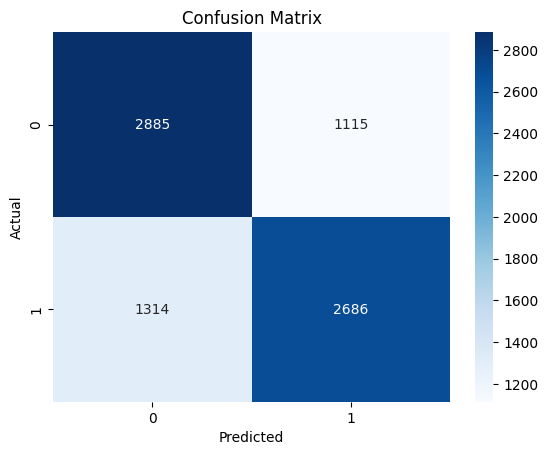

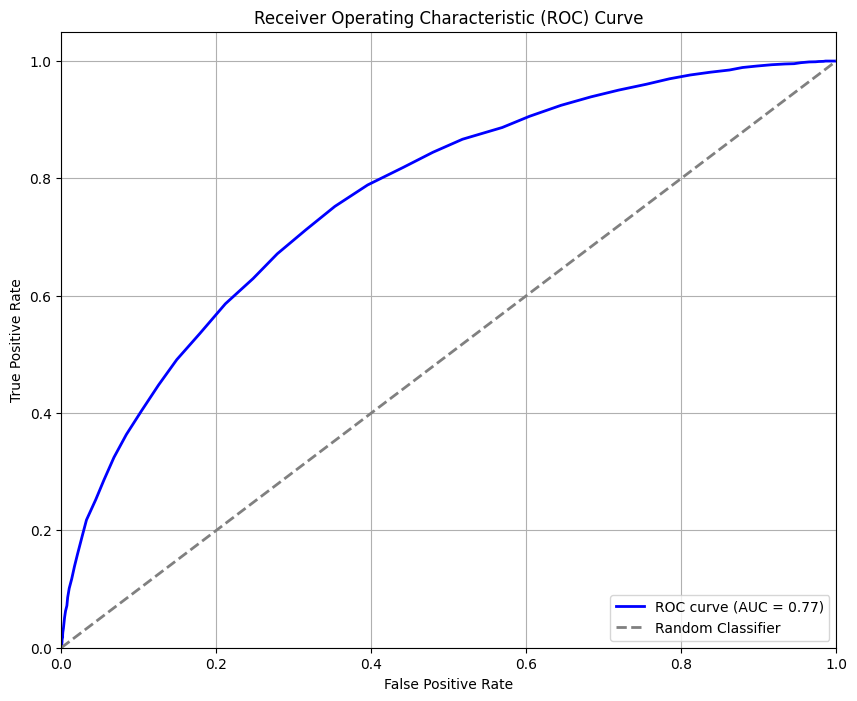

In [82]:
X = df_combined.drop(columns = ['Membership'])
y = df_combined['Membership']
train_evaluate_random_forest(X, y)

# MIA CV

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
#import lightgbm as LGBMClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb



class LGBMWrapper:
    def __init__(self):
        self.model = None

    def fit(self, X_train, y_train):
        self.model = lgb.LGBMClassifier()
        self.model.fit(X_train, y_train)

    def predict_proba(self, X_test):
        return self.model.predict_proba(X_test)[:, 1]

class XGBoostWrapper:
    def __init__(self):
        self.model = None

    def fit(self, X_train, y_train):
        self.model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
        self.model.fit(X_train, y_train)

    def predict_proba(self, X_test):
        return self.model.predict_proba(X_test)[:, 1]

class RandomForestWrapper:
    def __init__(self):
        self.model = None

    def fit(self, X_train, y_train):
        self.model = RandomForestClassifier()
        self.model.fit(X_train, y_train)

    def predict_proba(self, X_test):
        return self.model.predict_proba(X_test)[:, 1]

class SVCWrapper:
    def __init__(self):
        self.model = None

    def fit(self, X_train, y_train):
        self.model = SVC(probability=True)
        self.model.fit(X_train, y_train)

    def predict_proba(self, X_test):
        return self.model.predict_proba(X_test)[:, 1]

class MLPClassifierWrapper:
    def __init__(self):
        self.model = None

    def fit(self, X_train, y_train):
        self.model = MLPClassifier(max_iter=500)
        self.model.fit(X_train, y_train)

    def predict_proba(self, X_test):
        return self.model.predict_proba(X_test)[:, 1]

class KNeighborsClassifierWrapper:
    def __init__(self):
        self.model = None

    def fit(self, X_train, y_train):
        self.model = KNeighborsClassifier()
        self.model.fit(X_train, y_train)

    def predict_proba(self, X_test):
        return self.model.predict_proba(X_test)[:, 1]

class HistGradientBoostingWrapper:
    def __init__(self):
        self.model = None

    def fit(self, X_train, y_train):
        self.model = HistGradientBoostingClassifier()
        self.model.fit(X_train, y_train)

    def predict_proba(self, X_test):
        return self.model.predict_proba(X_test)[:, 1]


class GaussianNBWrapper:
    def __init__(self):
        self.model = None

    def fit(self, X_train, y_train):
        self.model = GaussianNB()
        self.model.fit(X_train, y_train)

    def predict_proba(self, X_test):
        return self.model.predict_proba(X_test)[:, 1]




class LGBMWeightedWrapper:
    def __init__(self):
        self.model = None

    def fit(self, X_train, y_train):
        self.model = lgb.LGBMClassifier(class_weight='balanced')  # Using 'balanced' to handle class imbalance
        self.model.fit(X_train, y_train)

    def predict_proba(self, X_test):
        return self.model.predict_proba(X_test)[:, 1]



In [20]:
classical_models = {
    'LGBM': LGBMWrapper(),
    'XGBClassifier': XGBoostWrapper(),
    'RandomForestClassifier': RandomForestWrapper(),
    'MLPClassifier': MLPClassifierWrapper()
}

Training and evaluating: LGBM
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16000, number of negative: 16000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.226108 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66048
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 260
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 16000, number of negative: 16000
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.109814 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 66048
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 260
[LightG

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:23:15] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:23:28] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:23:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:23:55] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [11:24:07] WARNING: /w

Training and evaluating: RandomForestClassifier
Training and evaluating: MLPClassifier


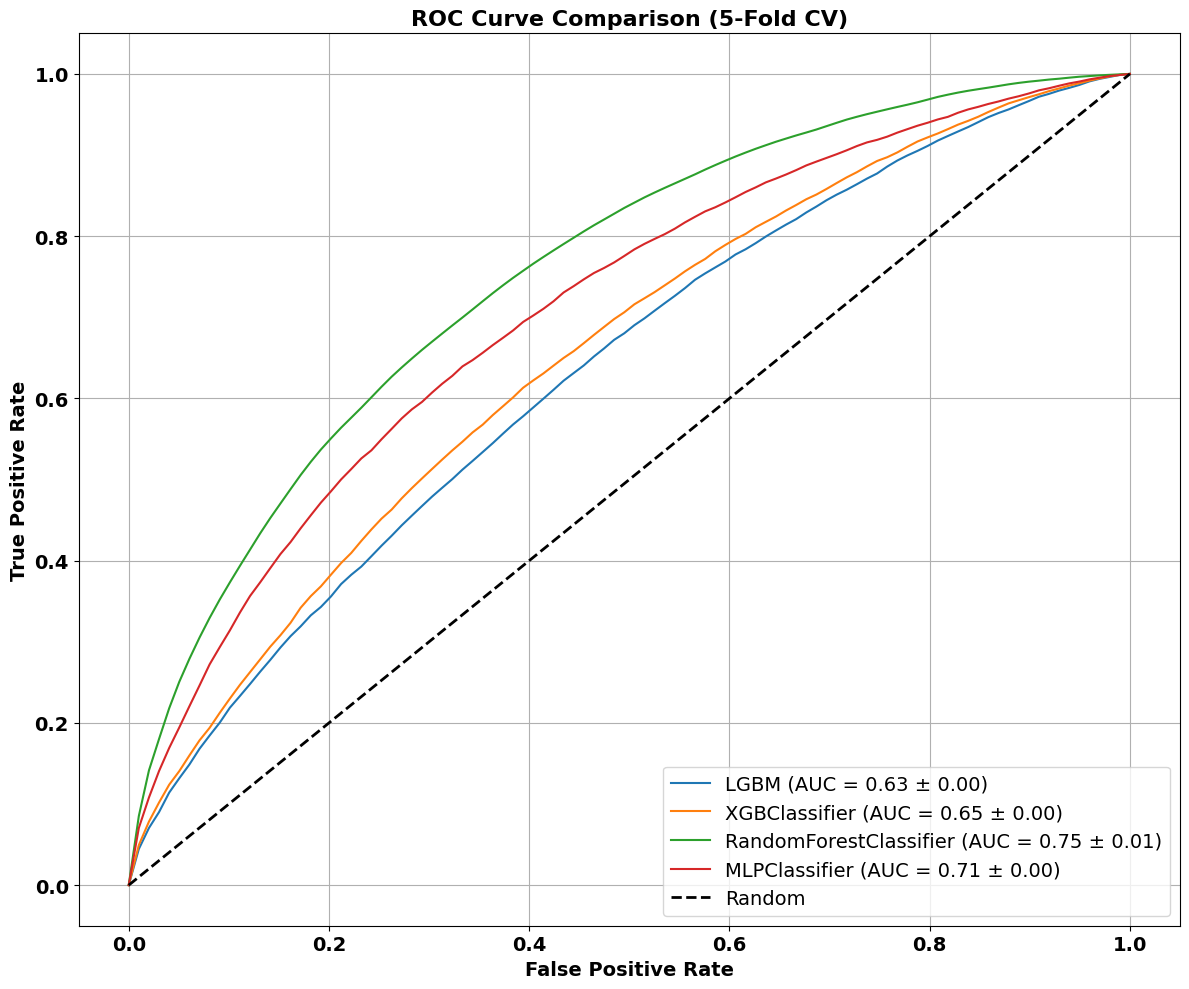

In [21]:
# OG
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split

X = df_combined.drop(columns = ['Membership'])
y = df_combined['Membership']


# Assumes `models` is a dictionary like {'AutoGluon': your_model, ...}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
mean_fpr = np.linspace(0, 1, 100)

plt.figure(figsize=(12, 10))
model_auc_dict = {}

for name, model in classical_models.items():
    print(f"Training and evaluating: {name}")
    tprs, aucs = [], []

    for train_idx, test_idx in cv.split(X, y):
        # Split data
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Scale features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        # Create DataFrames and align indices
        X_train_df = pd.DataFrame(X_train_scaled, columns=X_train.columns).reset_index(drop=True)
        X_test_df = pd.DataFrame(X_test_scaled, columns=X_train.columns)

        # Cast target to int and reset index
        y_train = y_train.astype(int).reset_index(drop=True)
        y_test = y_test.astype(int)  # for roc_curve



        # Fit model
        try:
            model.fit(X_train_df, y_train)
        except ValueError as e:
            print("🚨 ValueError during model fitting:")
            print("y_train dtype:", y_train.dtype)
            print("Index aligned?", X_train_df.index.equals(y_train.index))
            print("First few labels:", y_train.head())
            raise e




        # Predict probabilities
        y_proba = model.predict_proba(X_test_df)

        # ROC Curve and AUC
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)

        # Interpolation for plotting
        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tprs.append(interp_tpr)

    # Plot mean ROC
    mean_tpr = np.mean(tprs, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = np.mean(aucs)
    std_auc = np.std(aucs)
    model_auc_dict[name] = mean_auc
    plt.plot(mean_fpr, mean_tpr, label=f'{name} (AUC = {mean_auc:.2f} ± {std_auc:.2f})')

# Final plot settings
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random')
plt.xlabel('False Positive Rate', fontsize=14, fontweight='bold')
plt.ylabel('True Positive Rate', fontsize=14, fontweight='bold')
plt.title('ROC Curve Comparison (5-Fold CV)', fontsize=16, fontweight='bold')
plt.legend(loc='lower right', fontsize=14)
plt.xticks(fontsize=14, fontweight='bold')
plt.yticks(fontsize=14, fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.show()


# Advantage


In [51]:
# AUC using confidence score
auc = empirical_auc_sklearn(confidence_score_member, confidence_score_non_member)
print(f"Empirical AUC: {auc}")

Empirical AUC: 0.5027039999999999


In [52]:
# AUC using gradient norm score
auc = empirical_auc_sklearn(grads_member_norm, grads_non_member_norm)
print(f"Empirical AUC: {auc}")

Empirical AUC: 0.5193040000000001


In [53]:
# AUC using negative cross entropy loss
auc = empirical_auc_sklearn(negative_loss_member, negative_loss_non_member)
print(f"Empirical AUC: {auc}")

Empirical AUC: 0.5027039999999999


In [54]:
# Advantage for thresholds 0-10 in 0.1 intervals using negative cross entropy loss
for t in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
  advantage = empirical_advantage(negative_loss_member, negative_loss_non_member, t)
  print(f"Advantage = {advantage} for Threshold = {t}")

Advantage = 0.0 for Threshold = 0.0
Advantage = 0.0 for Threshold = 0.1
Advantage = 0.0 for Threshold = 0.2
Advantage = 0.0 for Threshold = 0.3
Advantage = 0.0 for Threshold = 0.4
Advantage = 0.0 for Threshold = 0.5
Advantage = 0.0 for Threshold = 0.6
Advantage = 0.0 for Threshold = 0.7
Advantage = 0.0 for Threshold = 0.8
Advantage = 0.0 for Threshold = 0.9
Advantage = 0.0 for Threshold = 1.0


In [55]:
# Advantage for thresholds 0-10 in 0.1 intervals using confidence score
for t in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
  advantage = empirical_advantage(confidence_score_member, confidence_score_non_member, t)
  print(f"Advantage = {advantage} for Threshold = {t}")

Advantage = 0.0 for Threshold = 0.0
Advantage = 0.020000000000000018 for Threshold = 0.1
Advantage = 0.03400000000000003 for Threshold = 0.2
Advantage = 0.017999999999999905 for Threshold = 0.3
Advantage = 0.01200000000000001 for Threshold = 0.4
Advantage = 0.01200000000000001 for Threshold = 0.5
Advantage = 0.018000000000000016 for Threshold = 0.6
Advantage = 0.026000000000000023 for Threshold = 0.7
Advantage = -0.006000000000000005 for Threshold = 0.8
Advantage = -0.03600000000000003 for Threshold = 0.9
Advantage = 0.0 for Threshold = 1.0


In [57]:
# Advantage for thresholds 0-10 in 0.1 intervals using gradient norm
for t in [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
  advantage = empirical_advantage(grads_member_norm, grads_non_member_norm, t)
  print(f"Advantage = {advantage} for Threshold = {t}")

Advantage = 0.0 for Threshold = 0.0
Advantage = 0.0 for Threshold = 0.1
Advantage = 0.0 for Threshold = 0.2
Advantage = 0.0 for Threshold = 0.3
Advantage = 0.0 for Threshold = 0.4
Advantage = 0.0 for Threshold = 0.5
Advantage = 0.0 for Threshold = 0.6
Advantage = 0.0 for Threshold = 0.7
Advantage = 0.0 for Threshold = 0.8
Advantage = 0.0 for Threshold = 0.9
Advantage = 0.0 for Threshold = 1.0
